 - **Introduction:**

1. Decision trees are easy to interpret and visualize.
2. It can easily capture Non-linear patterns and require less Data cleaning.
3. It doesn’t require any normalization and can be applied in both regression and classification problems.
- Here we have taken iris_dataset which has 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species' features(target class='Species').We can either load dataset from scikit_learn or else download the dataset on pc.

- our **objective** is to predict whether the new Iris flower falls in the  category that is one among **'Setosa',  'Virginica' ,'Versicolor'.**


#Prediction using Decision Tree Algorithm


In [176]:
#from google.colab import files
#files.upload()

##Import libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.datasets as datasets

##Reading dataset

In [178]:
#iris=datasets.load_iris()
#df=pd.DataFrame(iris.data, columns=iris.feature_names)
df = pd.read_csv('Iris.csv',index_col=0)


In [179]:
print ("Dataset Shape: ", df.shape) 

Dataset Shape:  (150, 5)


##Exploring the data

In [180]:
df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [181]:
#Gives all the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [182]:
#Gives statistical measures of our data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [183]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [184]:
#Finding if there are missing values in the data
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [185]:
#Gives relation among all the features present in data
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [186]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

##Exploratory Data Analysis

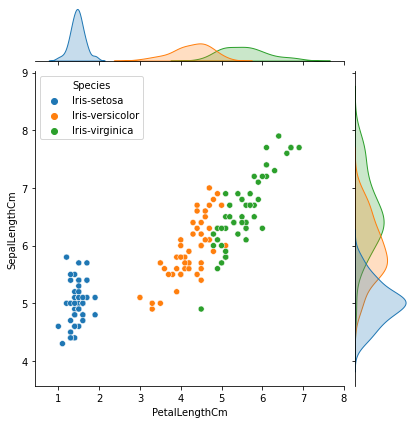

In [187]:
#Comparing lengths of petal and sepal for all the species
sns.jointplot(data=df, x="PetalLengthCm", y="SepalLengthCm",hue='Species')

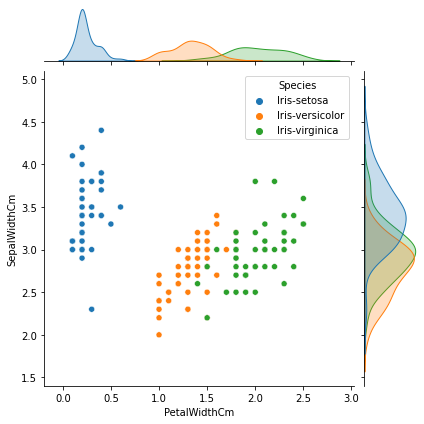

In [188]:
#Comparing widths of petal and sepal for all the species
sns.jointplot(data=df, x="PetalWidthCm", y="SepalWidthCm",hue='Species')

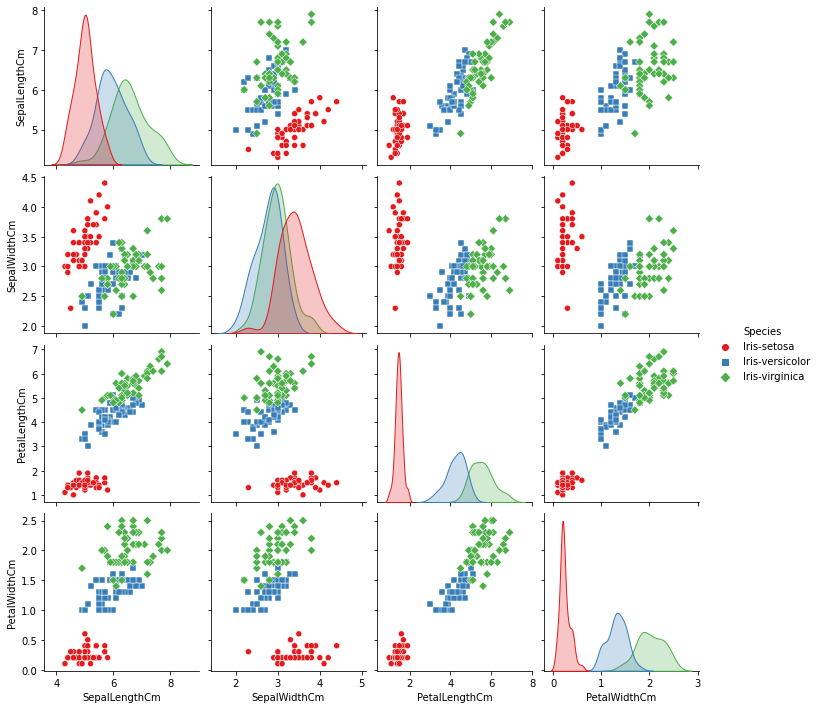

In [189]:
sns.pairplot(df,hue='Species',palette='Set1', markers=["o", "s", "D"])

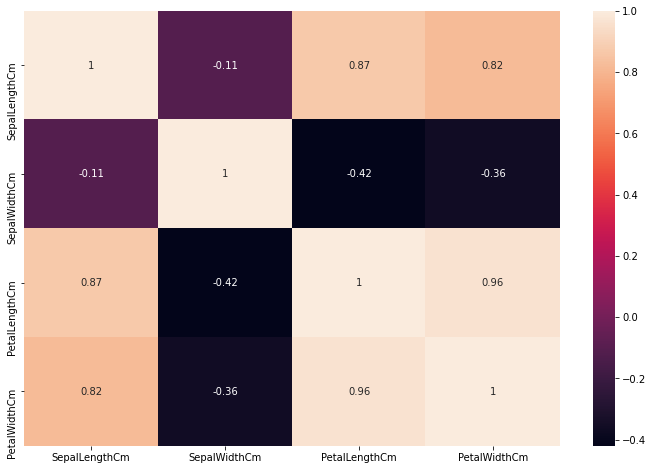

In [190]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

##Train Test Split

In [191]:
#X = df.iloc[:,:-1]
X = df.drop('Species',axis=1)  #All the features considered except 'Species'


In [192]:
y=df['Species']
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [194]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(105, 4) (105,) (45, 4) (45,)


##DecisionTreeClassifier model

In [195]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier(max_depth=3)
decision.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [196]:
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


In [197]:
y_pred = decision.predict(X_test)

In [198]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [199]:
compare= pd.DataFrame(list(zip(y_pred, y_test)), columns =['Predicted', 'Actual'])
compare[:10]

,Predicted,Actual
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


##Perfromance Metrics

In [200]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [201]:
import sklearn.metrics 
print("Accuracy:\n",sklearn.metrics.accuracy_score(y_test,y_pred))
# As dataset is small and Decision trees are quite powerful, hence 100% accuracy.

Accuracy:
 1.0


In [202]:
#confusion matrix
print("confusion matrix:\n", confusion_matrix(y_test,y_pred))



confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


##Tree Visualization

In [203]:
#Imports
from sklearn.tree import plot_tree
from sklearn import tree

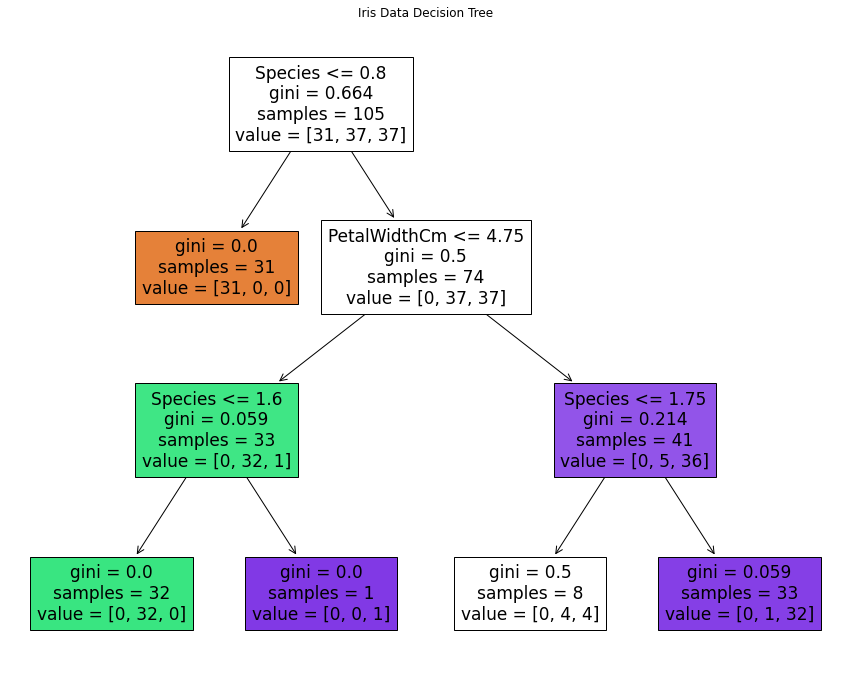

In [204]:
plt.figure(figsize = (15,12))
tree.plot_tree(decision,
               feature_names = df.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()

##Data Insights

- The above tree visualization shows the entire classification of categories with all the features.
- The dataset is balanced i.e. equal records are present for all three species.
- We have four numerical columns while just one categorical column which in turn is our target column.
- A strong correlation is present between petal width and petal length.
- The setosa species is the most easily distinguishable because of its small feature size.
- The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.

# THE END!!!